In [3]:

import sys
import os
import pandas as pd

import seaborn as sns

import numpy as np

import exp_driver.experiment as E

In [4]:

project_root = os.path.abspath("../../")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(sys.path)
print(project_root)

['/data/marci/mjakowsk/EDS4AI/DeficitProject', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python311.zip', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/lib-dynload', '', '/home/mjakowsk/.local/lib/python3.11/site-packages', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/site-packages']
/data/marci/mjakowsk/EDS4AI/DeficitProject


In [5]:
params = {
    #"deficit_params" : {"deficit_duration":0}
}
exps = E.match_experiments(directories=["sliding_window"], params=params)
print(len(exps))

54


In [6]:
deficit_type = []
final_test_acc = []
deficit_onset = []
deficit_duration = []
training_duration = []
id = []
accuracy_diff = []
convergence_epochs = []
total_durations = []

baseline_accuracy = 93.40

for exp_id, dir in exps:
    config = E.get_config(exp_id=exp_id, dir=dir)
    deficit_params = config["deficit_params"]

    if deficit_params["start_epoch"] > 320:
        continue
    #if deficit_params["start_epoch"] > 40:
        #continue

    onset = deficit_params["start_epoch"]
    end = deficit_params["end_epoch"]

    _, _, _, test_accs = E.get_data(exp_id=exp_id, dir= dir)

    final_acc = test_accs[-1]
    acc_diff = baseline_accuracy - final_acc

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        deficit_type.append(deficit_params["type"])
    else :
        deficit_type.append("blur")
        #deficit_type.append("random")

    num_post_epochs = config["num_epochs"] - end
    
    final_test_acc.append(final_acc)
    deficit_onset.append(onset)
    deficit_duration.append(end-onset)
    training_duration.append(config["num_epochs"])
    accuracy_diff.append(acc_diff)
    id.append(exp_id)
    convergence_epochs.append(num_post_epochs)
    total_durations.append(config["num_epochs"])
    



df = pd.DataFrame({
    "Type" : deficit_type,
    "Accuracy" : final_test_acc,
    "Window Onset (epoch)" : deficit_onset,
    "Window Duration" : deficit_duration,
    "Training Duration" : training_duration,
    "ID" : id,
    "Test Accuracy Decrease" : accuracy_diff,
    'Post Epochs' : convergence_epochs,
    "Total Duration" : total_durations,
                  })
    

Text(0.5, 1.0, 'Sliding Window Experiment Sensitivity')

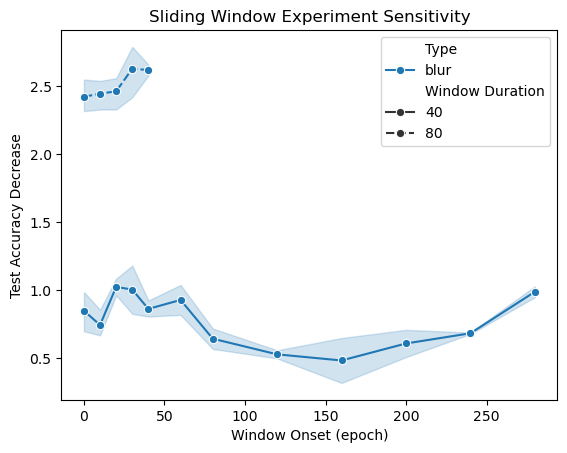

In [7]:

#filt = (df["Window Duration"] == 40)  & (df["Post Epochs"] >= 250) & (df["Window Onset (epoch)"] <= 40)
#filt = (df["Window Duration"] == 40)  & ( (df["Total Duration"] == 300) | (df["Total Duration"] ==  250))
s = sns.lineplot(data=df, x='Window Onset (epoch)', 
                 y='Test Accuracy Decrease', hue='Type', style="Window Duration", marker='o')
s.set_title("Sliding Window Experiment Sensitivity")